<a href="https://colab.research.google.com/github/THARUN-PROG/CHAT-GPT-CRAWLER-ENGINE/blob/main/Cartoon_Effect_on_Image_using_openCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lioading the image
def read_file(filename):
    img=cv2.imread(filename)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #changingcolor
    plt.imshow(img)
    plt.show()
    return img

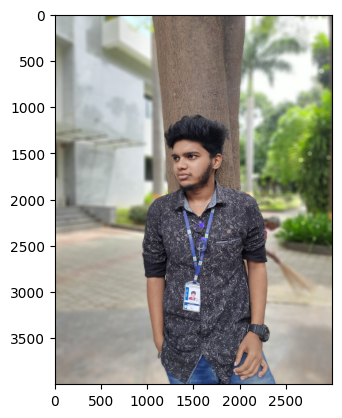

In [5]:
# filename="download.jpeg"
# filename="Image.jpg"
filename="/Image.jpg"
img=read_file(filename)

# to ddisplay the image side by side:-
org_img=np.copy(img)

In [6]:
#INCREASING EDGES BY USING EDGE MASK
def edge_mask(img,line_size,blur_value):
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur=cv2.medianBlur(gray,blur_value)
    edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
    return edges

# input:Input Image
# output: Edges of Images

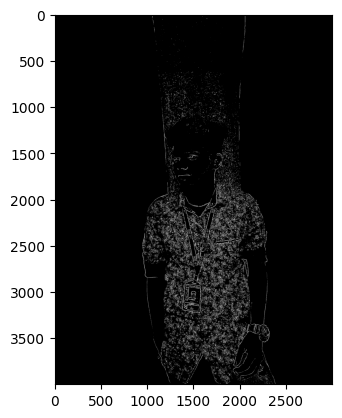

In [7]:
#FUNCTION CALL
line_size,blur_value=7,7
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges ,cmap="binary")
plt.show()

In [10]:
#REDUCE COLOR PALETTE

def color_quantization(img,k):

    #Transform the image
    data=np.float32(img).reshape((-1,3))

    #Determine Criteria
    criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,0.001)

    #Implementing k-means
    ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center=np.uint8(center)

    result=center[label.flatten()]
    result=result.reshape(img.shape)

    return result

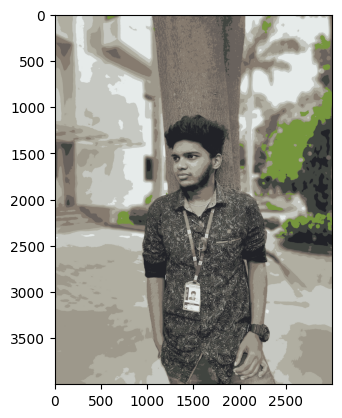

In [14]:
img_quantize=color_quantization(img,k=9)
plt.imshow(img_quantize)
plt.show()


COMBINE EDGE MASK WITH THE QUANTIZE IMAGE

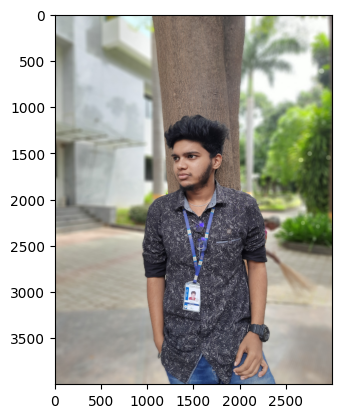

In [15]:
#we want to reduce the noise

blurred=cv2.bilateralFilter(img,d=3,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()

In [16]:
def cartoon():
    c=cv2.bitwise_and(blurred,blurred,mask=edges)
    # we here uses the edges func value declard above
    plt.imshow(c)
    plt.title("EFFECT APPLIED IMAGE")
    plt.show()
    # DISPLAYING THE COPIED IMAGE IN THE START WITH ANOTERH NAME AS ORG_IMG
    plt.imshow(org_img)
    plt.title("ORIGINAL IMAGE")
    plt.show()

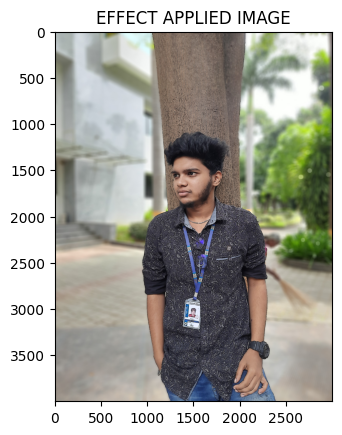

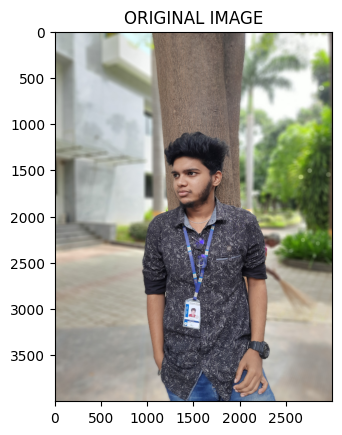

In [17]:
cartoon()